## By P.V.Karthikeya

## EDA and Feature Engineering 

Cleaning the data and data preparation and Model Training

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('dftest.csv')

In [84]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [85]:
df_test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [86]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [87]:
df_test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [88]:
df= df_train.merge(df_test,how='left')

In [89]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [91]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [92]:
# Droping unnecessasary columns
df.drop(['User_ID'],axis=1,inplace=True)

In [93]:
# finding the null values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [94]:
#converting categorical data to numerical data
pd.get_dummies(df['Gender'],drop_first=1)

,M
0,False
1,False
2,False
3,False
4,True
...,...
550063,True
550064,False
550065,False
550066,False


# handling categorical data

In [95]:
# handling Gender columns
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [96]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


In [97]:
# handling categorical Age col
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [99]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [100]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969


In [101]:
df_city = pd.get_dummies(df['City_Category'], drop_first=True).astype(int)

In [102]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [103]:
df=pd.concat([df,df_city],axis=1)

In [104]:
df.drop(['City_Category'],axis=1,inplace=True)

In [105]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969,0,1


# Handling the Missing values

In [106]:
nullval=df.isnull().sum()

In [107]:
#Replacing Missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [108]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64

In [109]:
# Rplacing the null values with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [110]:
# checking the null values in col
df['Product_Category_2'].isnull().sum()

0

In [111]:
#Replacing the null Values in Product category 3
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: count, dtype: int64

In [112]:
#Replacing the missing values with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [113]:
# checking the null values in Product category col 3
df['Product_Category_3'].isnull().sum()

0

In [114]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [115]:
#Replacing the 4+ with 4 
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')

In [116]:
#converting object to integer
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

# Visualization 

<Axes: xlabel='Age', ylabel='Purchase'>

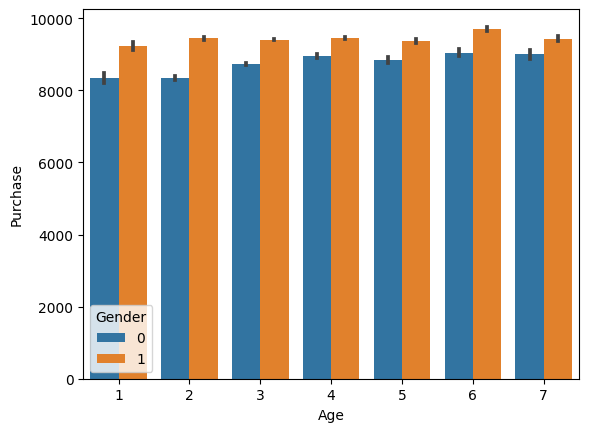

In [117]:
#bar plot cmparing 'Age' and 'Purchase'
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)


<Axes: xlabel='Occupation', ylabel='Purchase'>

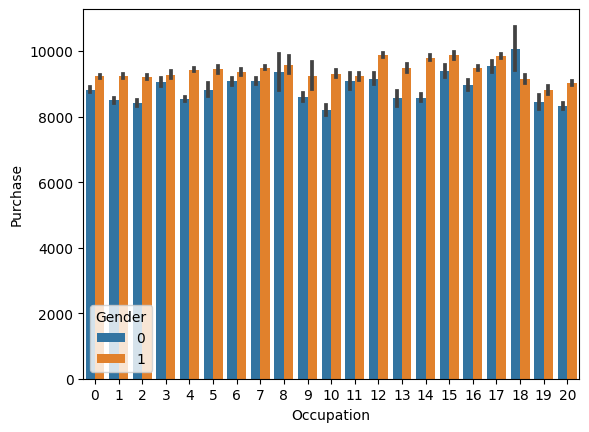

In [118]:
#Visualization of purchase with occupation
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

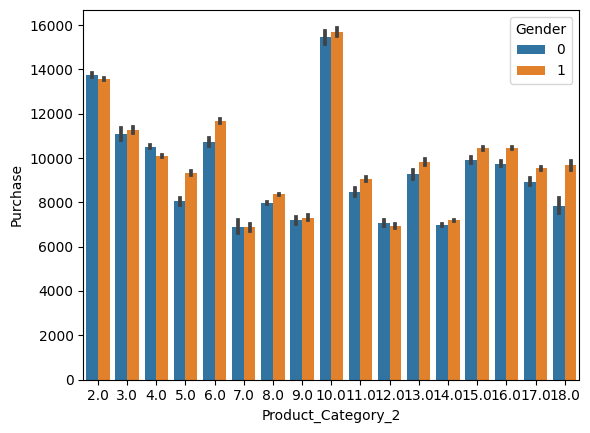

In [119]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

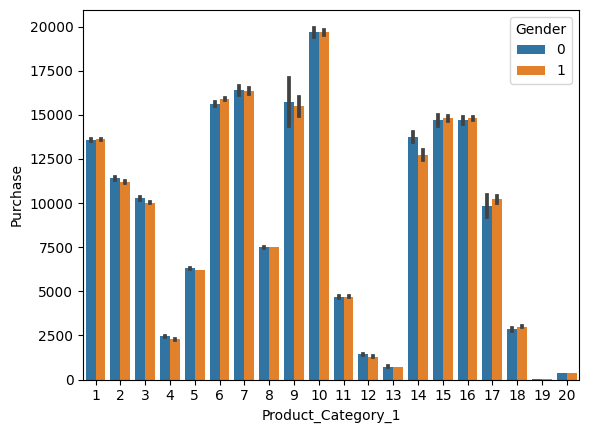

In [120]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

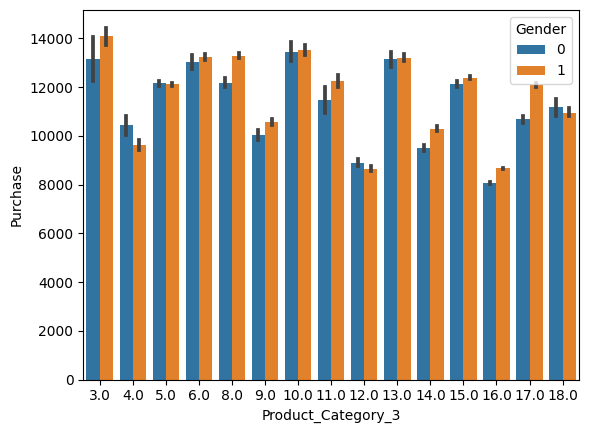

In [121]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)

#  Feature Scaling

In [122]:
df_test=df[df['Purchase'].isnull()]

In [123]:
df_train=df[~df['Purchase'].isnull()]

In [129]:
X=df_train.drop('Purchase',axis=1)
X.head()
X.shape

(550068, 11)

In [132]:
Y=df_train['Purchase']
Y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [134]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)


In [136]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [137]:
print(X_train)

[[ 0.57141282 -1.10505734  0.90867822 ...  0.36891877  1.17569512
  -0.67282374]
 [ 0.57141282  1.84716932 -1.23820419 ...  0.36891877 -0.85056064
  -0.67282374]
 [ 0.57141282  0.37105599  1.36872445 ... -1.09182956 -0.85056064
   1.48627336]
 ...
 [-1.75004823 -1.10505734 -1.08485545 ...  0.36891877  1.17569512
  -0.67282374]
 [-1.75004823 -1.10505734 -0.62480922 ...  0.36891877  1.17569512
  -0.67282374]
 [-1.75004823 -1.10505734 -0.93150671 ...  0.36891877 -0.85056064
  -0.67282374]]


In [138]:
print(X_test)

[[ 0.57491817  1.85432241  1.67314502 ...  0.36853635 -0.85317164
   1.490841  ]
 [-1.73937798  0.37396835  0.44724923 ...  0.36853635  1.1720971
  -0.67076234]
 [-1.73937798  0.37396835 -1.23835749 ...  0.36853635 -0.85317164
  -0.67076234]
 ...
 [ 0.57491817 -1.10638572 -0.93188354 ...  0.36853635 -0.85317164
   1.490841  ]
 [ 0.57491817  0.37396835 -0.16569867 ...  0.00396261 -0.85317164
   1.490841  ]
 [ 0.57491817 -1.10638572 -0.62540959 ...  0.36853635  1.1720971
  -0.67076234]]
